In [1]:
import pandas as pd
import json
import folium
from folium.plugins import MarkerCluster # for clustering the markers
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as scs
import numpy as np


In [2]:
df = pd.read_csv('Data/zipcodes_annual_la.csv',index_col=0)
df = df.T.reset_index()
df.head()

Date,index,1996-01-01,1997-01-01,1998-01-01,1999-01-01,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,...,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01
0,90250,152644,154158,163258,174941,192300,216741,254125,315225,403675,...,369091,366641,359066,350866,398558,436075,472525,525216,577383,609375
1,90046,347055,385091,454850,514091,566050,597966,668000,800716,983525,...,1142383,1138816,1014050,992033,1198491,1330083,1524008,1683416,1840208,1967425
2,90034,233100,248825,286850,324266,356133,388233,444633,546450,696025,...,698566,699825,683783,679983,804941,887133,941875,1090475,1277958,1402800
3,90044,119300,121741,130166,132933,135250,141191,157116,184166,241058,...,234883,208475,216958,215308,241000,273858,300708,342225,383958,415900
4,90805,127233,127050,132883,138383,151458,167525,192900,235716,315375,...,273600,262541,253083,253850,300750,334500,357975,392375,427066,455850


In [3]:
df.rename({'index':'Zipcode'},axis=1,inplace=True)

# Creating Columns for different ROI points


According to the Bureau of Labor Statistics consumer price index, prices in 2018 are 7.84% higher than average prices since 2013. The U.S. dollar experienced an average inflation rate of 1.52% per year during this period, causing the real value of a dollar to decrease.

In [4]:
df['ROI_5year'] = (df['2018-01-01']-(df['2013-01-01']*1.0784))/(df['2013-01-01']*1.0784)

According to the Bureau of Labor Statistics consumer price index, prices in 2018 are 6.00% higher than average prices since 2015. The U.S. dollar experienced an average inflation rate of 1.96% per year during this period, causing the real value of a dollar to decrease.

In [5]:
df['ROI_3year'] = (df['2018-01-01']-(df['2015-01-01']*1.06))/(df['2015-01-01']*1.06)

According to the Bureau of Labor Statistics consumer price index, prices in 2018 are 2.49% higher than average prices since 2017. The U.S. dollar experienced an average inflation rate of 2.49% per year during this period, causing the real value of a dollar to decrease.

In [6]:
df['ROI_1year'] = (df['2018-01-01']-(df['2017-01-01']*1.0249))/(df['2017-01-01']*1.0249)

According to the Bureau of Labor Statistics consumer price index, prices in 2013 are 15.55% higher than average prices since 2006. The U.S. dollar experienced an average inflation rate of 2.09% per year during this period, causing the real value of a dollar to decrease.

In [7]:
df['ROI_06-13'] = (df['2013-01-01']-(df['2006-01-01']*1.1555))/(df['2006-01-01']*1.1555)

In [8]:
cols =['Zipcode','2018-01-01','2006-01-01','2013-01-01','2012-01-01','ROI_5year','ROI_3year','ROI_1year','ROI_06-13']

In [9]:
df = df[cols]

In [10]:
df.head()

Date,Zipcode,2018-01-01,2006-01-01,2013-01-01,2012-01-01,ROI_5year,ROI_3year,ROI_1year,ROI_06-13
0,90250,609375,552491,398558,350866,0.417794,0.216617,0.029767,-0.375696
1,90046,1967425,1409741,1198491,992033,0.522241,0.217882,0.043157,-0.264258
2,90034,1402800,836366,804941,679983,0.616039,0.405066,0.071020,-0.167091
3,90044,415900,404383,241000,215308,0.600265,0.304782,0.056875,-0.484232
4,90805,455850,456033,300750,253850,0.405518,0.201333,0.041467,-0.429259


In [11]:
df.rename({'2018-01-01':'Home_Value_2018','2006-01-01':'Home_Value_2006','2013-01-01':'Home_Value_2013','2012-01-01':'Home_Value_2012'},axis=1,inplace=True)

In [12]:
df['Zipcode'] = df['Zipcode'].astype('str')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Zipcode          347 non-null    object 
 1   Home_Value_2018  347 non-null    int64  
 2   Home_Value_2006  347 non-null    int64  
 3   Home_Value_2013  347 non-null    int64  
 4   Home_Value_2012  347 non-null    int64  
 5   ROI_5year        347 non-null    float64
 6   ROI_3year        347 non-null    float64
 7   ROI_1year        347 non-null    float64
 8   ROI_06-13        347 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 24.5+ KB


In [14]:
with open('ca_california_zip_codes_geo.min.json','r') as jsonFile:
    data = json.load(jsonFile)

In [15]:
geozips = []
for i in range(len(data['features'])):
    if data['features'][i]['properties']["ZCTA5CE10"] in list(df['Zipcode'].unique()):
        geozips.append(data['features'][i])


In [16]:
new_json = dict.fromkeys(['type','feature'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

In [17]:
open("cleaned_geodata.json", "w").write(json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': ')))

28316616

In [20]:
with open('cleaned_geodata.json','r') as jsonFile:
    geo = json.load(jsonFile)

In [21]:
geo = r'cleaned_geodata.json'

In [22]:

def create_map_LA_Area(df,col,legend ='Insert legend description'):
    """
    Generates a folium map of LA Area
    :param zipcode_data: zipcode dataset
    :param col: feature to display
    :param legend: Insert description for legend based on feature
    :return: mp
    """ 
    geo = r'cleaned_geodata.json'
    mp = folium.Map(location=[34.0522, -118.2437], default_zoom_start=11)

    folium.Choropleth(geo_data=kc_geo, 
                # my dataset                      
                 data=df, 
                # zip code is here for matching the geojson zipcode, col changes the color of zipcode areas
                 columns=['Zipcode', col],
                # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
                 key_on='feature.properties.ZCTA5CE10', 
                 fill_color='Reds', legend_name=legend,fill_opacity=0.7, line_opacity=0.3).add_to(mp)
   
    mp.save(outfile = legend +'.html')
    




In [23]:
create_map_LA_Area(df=df,col='Home_Value_2018',legend='Home Value in 2018')

In [24]:
create_map_LA_Area(df=df,col='Home_Value_2006',legend='Home Value in 2006')

In [25]:
create_map_LA_Area(df=df,col='ROI_5year',legend='ROI since 2013')

In [28]:
create_map_LA_Area(df=df,col='ROI_3year',legend='ROI since 2015')

In [29]:
create_map_LA_Area(df=df,col='ROI_1year',legend='ROI since 2017')

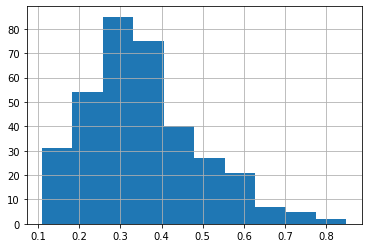

In [30]:
df['ROI_5year'].hist()

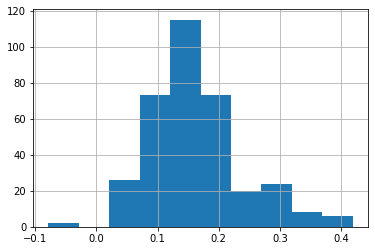

In [31]:
df['ROI_3year'].hist()

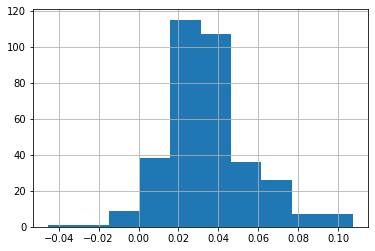

In [32]:
df['ROI_1year'].hist()

In [33]:
df.head()

Date,Zipcode,Home_Value_2018,Home_Value_2006,Home_Value_2013,Home_Value_2012,ROI_5year,ROI_3year,ROI_1year,ROI_06-13
0,90250,609375,552491,398558,350866,0.417794,0.216617,0.029767,-0.375696
1,90046,1967425,1409741,1198491,992033,0.522241,0.217882,0.043157,-0.264258
2,90034,1402800,836366,804941,679983,0.616039,0.405066,0.071020,-0.167091
3,90044,415900,404383,241000,215308,0.600265,0.304782,0.056875,-0.484232
4,90805,455850,456033,300750,253850,0.405518,0.201333,0.041467,-0.429259


In [34]:
df['AvgROI'] = (df['ROI_1year']+df['ROI_3year']+df['ROI_5year'])/3

In [35]:
df['diff'] = df['Home_Value_2018'] - df['Home_Value_2006']

In [36]:
df['drop'] = (df['Home_Value_2006']-df['Home_Value_2012'])/df['Home_Value_2006']

In [37]:
dfdiff = df.loc[(np.abs(df['diff'])<10000)&(df['ROI_3year']<0.3)].sort_values(by='diff',ascending=False)[:5]
dfdiff

Date,Zipcode,Home_Value_2018,Home_Value_2006,Home_Value_2013,Home_Value_2012,ROI_5year,ROI_3year,ROI_1year,ROI_06-13,AvgROI,diff,drop
300,92844,593950,584100,424925,368958,0.296157,0.155997,0.028780,-0.370414,0.160311,9850,0.368331
125,91767,431375,422075,273025,234216,0.465118,0.196494,0.046546,-0.440187,0.236053,9300,0.445084
141,90620,582100,573166,424925,365041,0.270297,0.141133,0.031666,-0.358404,0.147699,8934,0.363115
196,90023,407125,398516,245858,208175,0.535549,0.250465,0.023316,-0.466089,0.269776,8609,0.477624
252,92841,609425,601725,434766,371033,0.299825,0.150434,0.028902,-0.374701,0.159720,7700,0.383384


In [38]:
dfdiff['Zipcode'].values

array(['92844', '91767', '90620', '90023', '92841'], dtype=object)

# Criteria for Model : Choosing Based on:
   * ROI  - 3 years > 10%
   * Home Value under 500,000
   * Home Price no more or less than 10,000 difference from 2006 peak
    

In [39]:
zips = df.loc[(df['ROI_3year']>0.1) & (df['Home_Value_2018']<500000)&(np.abs(df['diff'])<20000)]
zips = zips.sort_values(by='ROI_1year',ascending=False)
zips

Date,Zipcode,Home_Value_2018,Home_Value_2006,Home_Value_2013,Home_Value_2012,ROI_5year,ROI_3year,ROI_1year,ROI_06-13,AvgROI,diff,drop
297,90304,488300,479575,297033,247916,0.524411,0.306871,0.076735,-0.463983,0.302672,8725,0.483051
78,90037,437500,422325,253425,215775,0.600843,0.293944,0.071442,-0.480683,0.322076,15175,0.489078
183,90002,358700,366750,206300,180975,0.612324,0.286433,0.067491,-0.513190,0.322083,-8050,0.506544
227,90059,363975,368833,215133,187933,0.568862,0.271124,0.062027,-0.495214,0.300671,-4858,0.490466
284,90222,372675,366050,224233,194958,0.541171,0.255124,0.061899,-0.469862,0.286065,6625,0.467401
3,90044,415900,404383,241000,215308,0.600265,0.304782,0.056875,-0.484232,0.320641,11517,0.467564
161,90220,392850,379808,248791,218375,0.464240,0.242455,0.054921,-0.433108,0.253872,13042,0.425038
60,90813,446525,445841,275391,225041,0.503544,0.247627,0.053846,-0.465436,0.268339,684,0.495244
274,91768,411225,407000,255083,211391,0.494921,0.207654,0.048888,-0.457603,0.250488,4225,0.480612
125,91767,431375,422075,273025,234216,0.465118,0.196494,0.046546,-0.440187,0.236053,9300,0.445084


In [40]:
create_map_LA_Area(zips,'Home_Value_2018',legend = 'House Value')

In [41]:
zipcodes_for_model = list(zips['Zipcode'].values)

In [42]:
len(zipcodes_for_model)

36

In [43]:
zips.describe()

Date,Home_Value_2018,Home_Value_2006,Home_Value_2013,Home_Value_2012,ROI_5year,ROI_3year,ROI_1year,ROI_06-13,AvgROI,diff,drop
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,433739.583333,435236.027778,280102.277778,241382.111111,0.447233,0.208558,0.040139,-0.445279,0.231977,-1496.444444,0.447475
std,40833.480825,41291.328415,40403.234160,34890.272079,0.089175,0.056967,0.014891,0.035021,0.051373,10703.100457,0.037040
min,357525.000000,366050.000000,206300.000000,180975.000000,0.297809,0.121342,0.018311,-0.518220,0.148377,-18483.000000,0.388614
25%,409600.000000,402916.250000,249529.000000,215370.250000,0.371478,0.169224,0.028531,-0.465599,0.189625,-11764.000000,0.414495
50%,435887.500000,444966.000000,281153.500000,246850.000000,0.443234,0.198648,0.037920,-0.445865,0.224898,-991.500000,0.445339
75%,465056.250000,460893.750000,313093.500000,268885.000000,0.508761,0.251629,0.047132,-0.423730,0.270637,8638.000000,0.478371
max,496525.000000,512158.000000,350075.000000,305525.000000,0.612324,0.307423,0.076735,-0.383315,0.322083,15300.000000,0.527746


In [44]:
df['Home_Value_2018'].min()

226600

In [45]:
df2 = pd.read_csv('Data/zipcity_la.csv',index_col=0)
df2

,Zipcode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Zip_city
15,90250,152500.0,152600.0,152600.0,152600.0,152600.0,152600.0,152600.0,152700.0,153000.0,...,585700,590900,594700,598500,601300,602800,606100,612400,616200,"90250, Hawthorne"
30,90046,340600.0,341700.0,343000.0,344400.0,346100.0,348000.0,350300.0,353000.0,356400.0,...,1861100,1888600,1903900,1907500,1922100,1952400,1974500,1975900,1966900,"90046, Los Angeles"
75,90034,231300.0,231700.0,232100.0,232400.0,232700.0,233200.0,233800.0,234700.0,236000.0,...,1310000,1329900,1347200,1360300,1368500,1382700,1398000,1411400,1419100,"90034, Los Angeles"
86,90044,119500.0,119500.0,119400.0,119300.0,119200.0,119100.0,119100.0,119200.0,119400.0,...,386900,390600,394300,398600,404200,409700,414300,418500,421100,"90044, Los Angeles"
90,90805,128300.0,128100.0,127800.0,127500.0,127100.0,126800.0,126600.0,126400.0,126500.0,...,430600,434800,439300,443500,447700,451700,455000,457600,459100,"90805, Long Beach"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12009,90704,276300.0,275100.0,273800.0,272500.0,271300.0,270400.0,269900.0,269600.0,269700.0,...,643200,651800,659800,661900,660200,659200,665200,688500,714300,"90704, Avalon"
12857,93532,116400.0,116400.0,116300.0,116300.0,116200.0,116200.0,116300.0,116400.0,116700.0,...,255400,258100,259900,261600,264000,266400,270500,276600,280800,"93532, Lake Hughes"
13699,93553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202400,204800,209200,214000,216700,218600,224100,230000,233700,"93553, Pearblossom"
13834,92676,202100.0,201500.0,201100.0,200600.0,200400.0,200400.0,200600.0,201100.0,201900.0,...,639000,642100,647400,654400,660500,666700,671600,674700,674400,"92676, Silverado"


In [46]:
dfformodel = df2.loc[df2['Zipcode'].isin(zipcodes_for_model)]

In [47]:
dfformodel.head()

,Zipcode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Zip_city
86,90044,119500.0,119500.0,119400.0,119300.0,119200.0,119100.0,119100.0,119200.0,119400.0,...,386900,390600,394300,398600,404200,409700,414300,418500,421100,"90044, Los Angeles"
90,90805,128300.0,128100.0,127800.0,127500.0,127100.0,126800.0,126600.0,126400.0,126500.0,...,430600,434800,439300,443500,447700,451700,455000,457600,459100,"90805, Long Beach"
94,90650,146800.0,146400.0,145900.0,145400.0,145000.0,144500.0,144200.0,144000.0,144000.0,...,458000,462500,466200,469200,473000,476600,479300,481200,481800,"90650, Norwalk"
204,90201,149000.0,148600.0,148000.0,147500.0,147000.0,146500.0,146100.0,145800.0,145700.0,...,412700,417200,421000,425100,429300,432900,435400,437200,437400,"90201, Bell"
263,90011,114000.0,114000.0,114000.0,114000.0,114100.0,114200.0,114400.0,114600.0,115000.0,...,359200,363800,367400,370100,372200,374200,376300,378000,377800,"90011, Los Angeles"


In [48]:
dfformodel.set_index('Zip_city',inplace=True)

In [49]:
dfformodel.drop(columns='Zipcode',inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


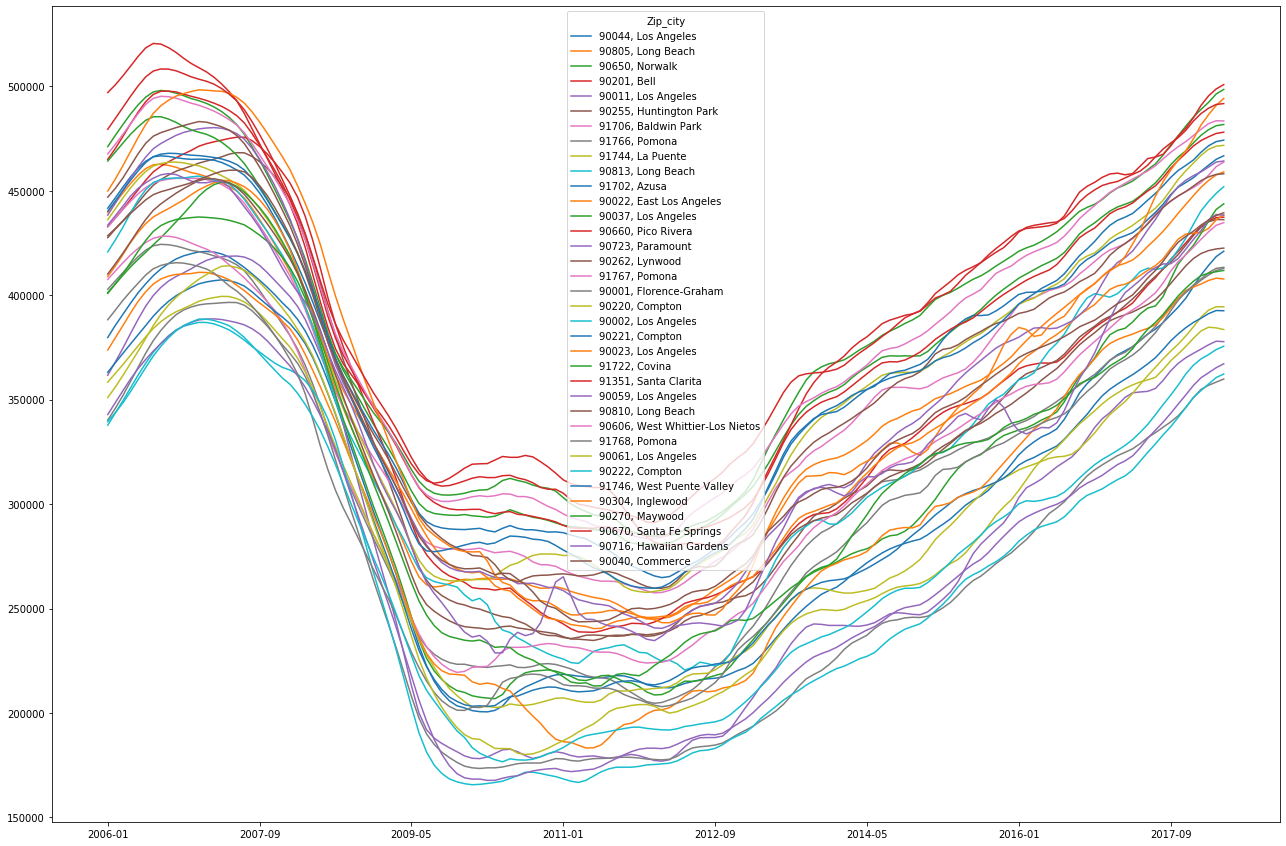

In [50]:
dfformodel.T['2006':].plot(figsize = (22,15), subplots=False, legend=True)

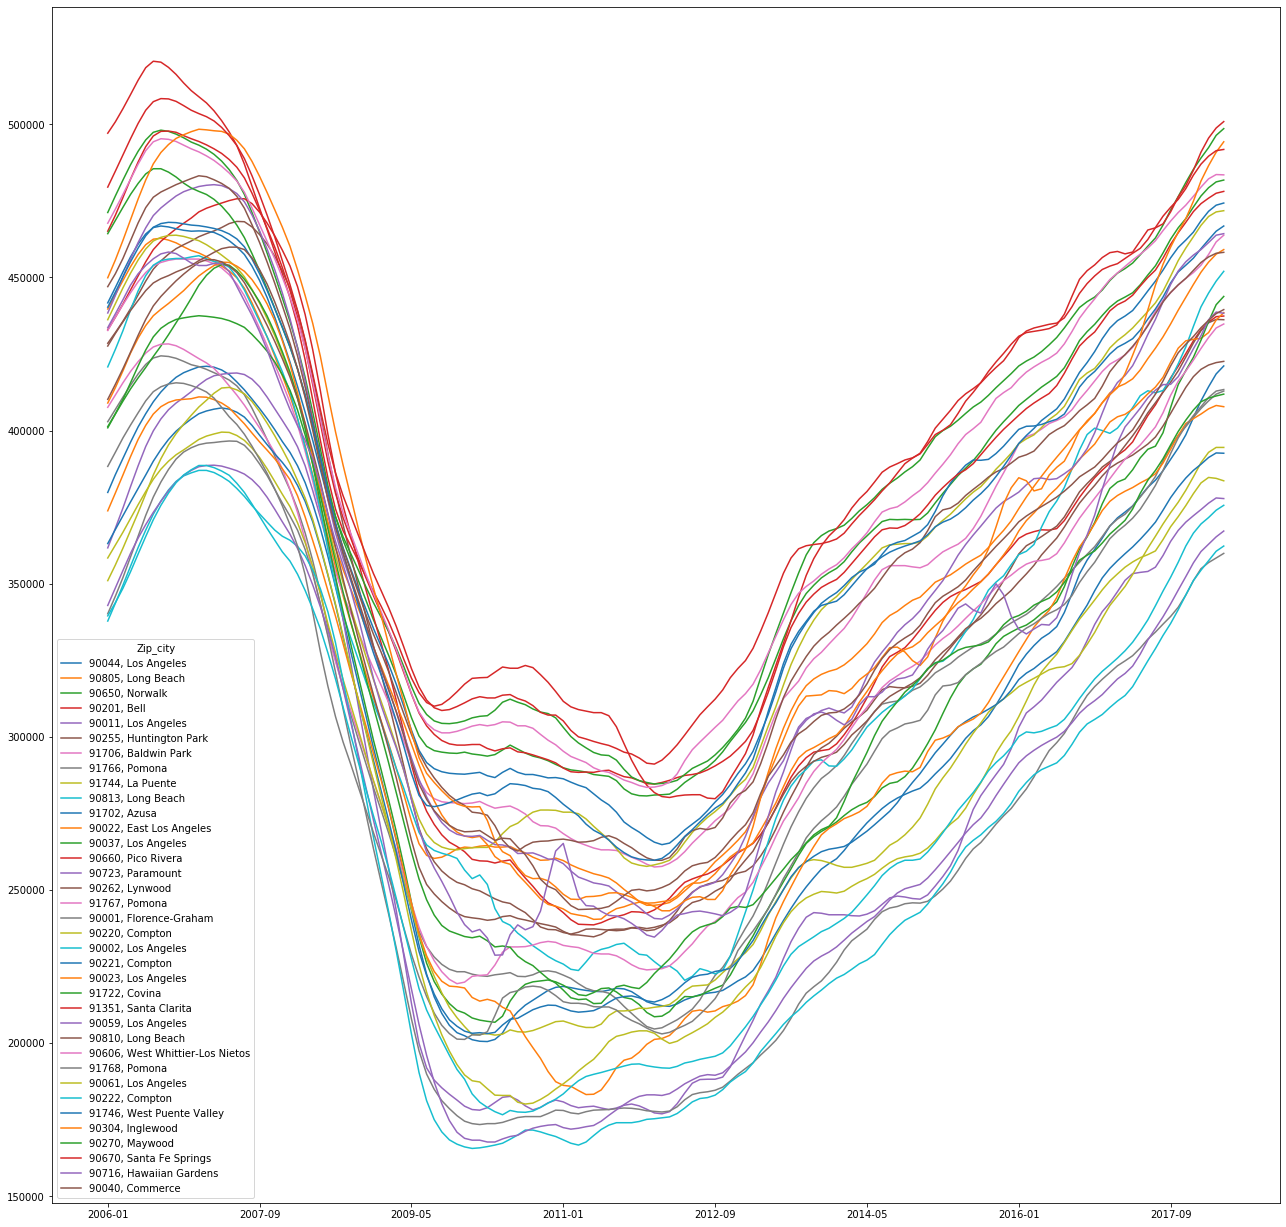

In [51]:
dfformodel.T['2006':].plot(figsize = (22,22), subplots=False, legend=True)

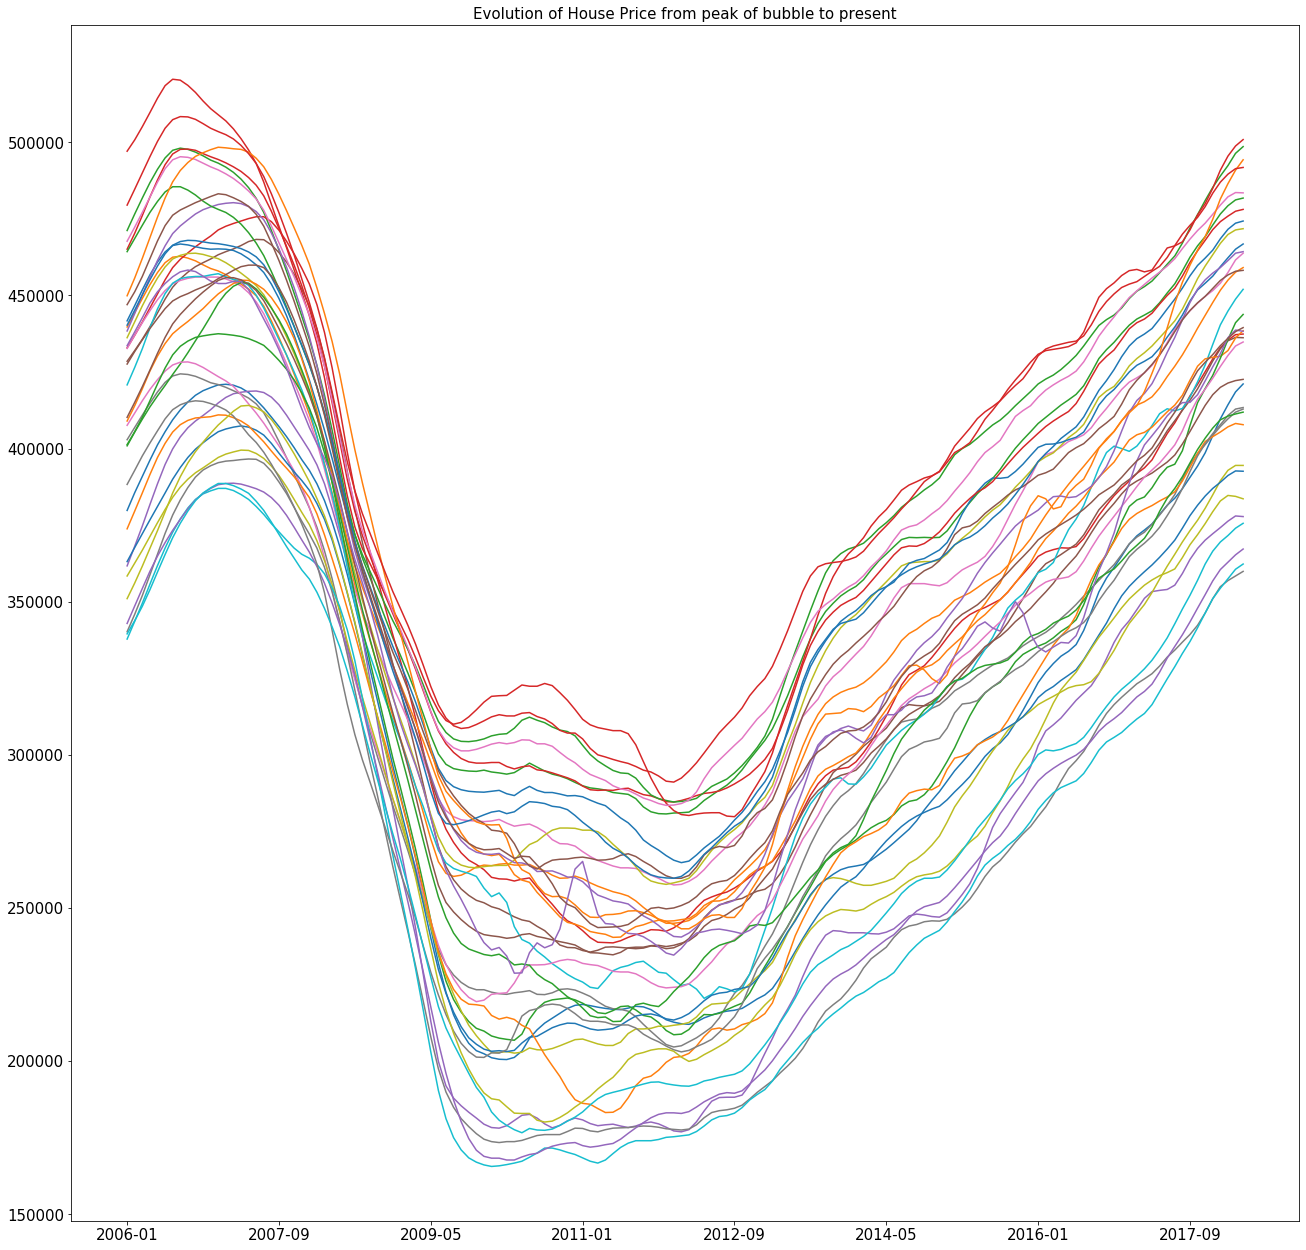

In [52]:
dfformodel.T['2006':].plot(figsize = (22,22), subplots=False, legend=False)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Evolution of House Price from peak of bubble to present",size=15)
plt.show()

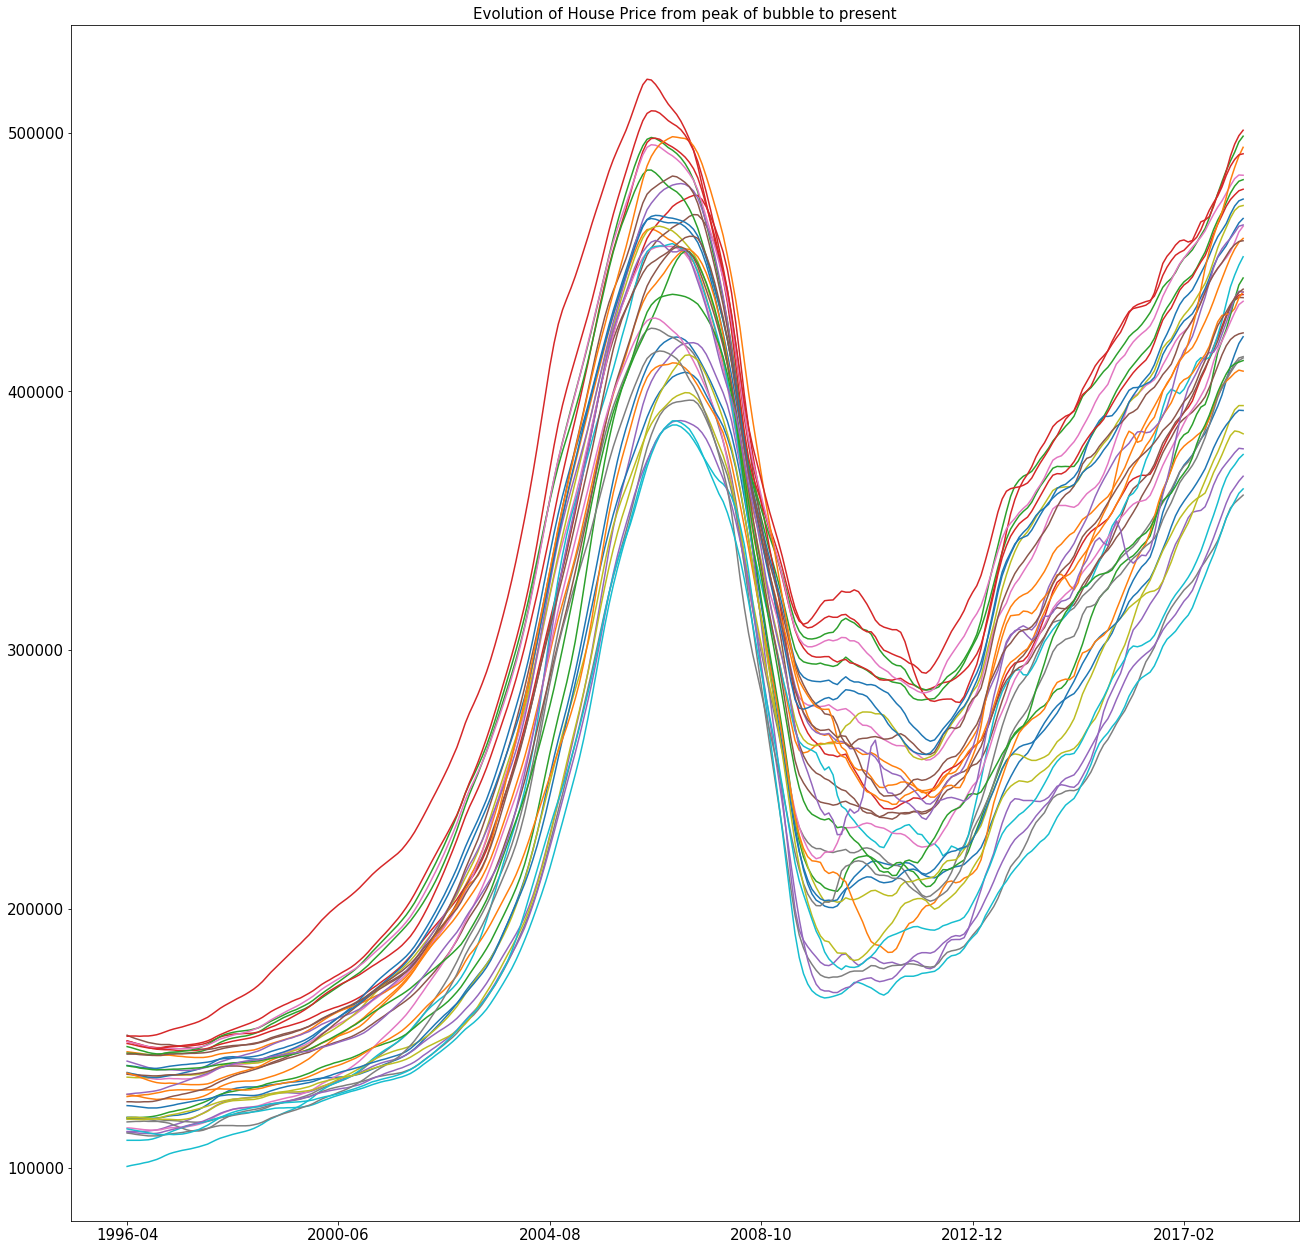

In [53]:
dfformodel.T['1996':].plot(figsize = (22,22), subplots=False, legend=False)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Evolution of House Price from peak of bubble to present",size=15)
plt.show()

In [54]:
zips = zips.sort_values(by='ROI_3year',ascending=False)

In [55]:
zips.describe()

Date,Home_Value_2018,Home_Value_2006,Home_Value_2013,Home_Value_2012,ROI_5year,ROI_3year,ROI_1year,ROI_06-13,AvgROI,diff,drop
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,433739.583333,435236.027778,280102.277778,241382.111111,0.447233,0.208558,0.040139,-0.445279,0.231977,-1496.444444,0.447475
std,40833.480825,41291.328415,40403.234160,34890.272079,0.089175,0.056967,0.014891,0.035021,0.051373,10703.100457,0.037040
min,357525.000000,366050.000000,206300.000000,180975.000000,0.297809,0.121342,0.018311,-0.518220,0.148377,-18483.000000,0.388614
25%,409600.000000,402916.250000,249529.000000,215370.250000,0.371478,0.169224,0.028531,-0.465599,0.189625,-11764.000000,0.414495
50%,435887.500000,444966.000000,281153.500000,246850.000000,0.443234,0.198648,0.037920,-0.445865,0.224898,-991.500000,0.445339
75%,465056.250000,460893.750000,313093.500000,268885.000000,0.508761,0.251629,0.047132,-0.423730,0.270637,8638.000000,0.478371
max,496525.000000,512158.000000,350075.000000,305525.000000,0.612324,0.307423,0.076735,-0.383315,0.322083,15300.000000,0.527746


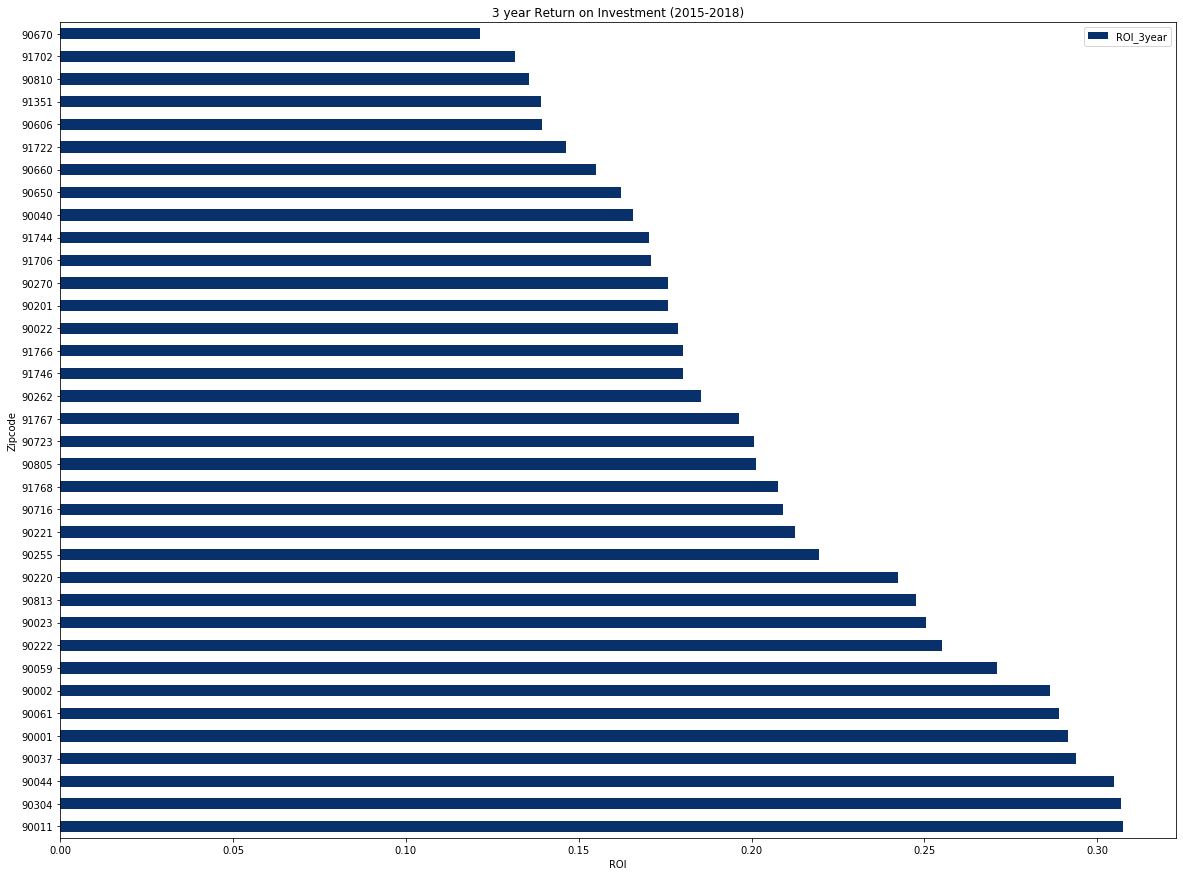

In [58]:
# Closer look at the zip codes and their home values
zips.plot(x = "Zipcode", y ="ROI_3year", kind = "barh",
              figsize = (20, 15),colormap="Blues_r")
plt.xlabel("ROI")
plt.title("3 year Return on Investment (2015-2018)")
plt.show()

In [59]:
create_map_LA_Area(df=zips,col='ROI_5year',legend='Final Zipcodes')

In [60]:
top10_3ROI = zips.sort_values(by='ROI_3year',ascending=False)[:10]

In [61]:
top10_3ROI['Zipcode'].values

array(['90011', '90304', '90044', '90037', '90001', '90061', '90002',
       '90059', '90222', '90023'], dtype=object)

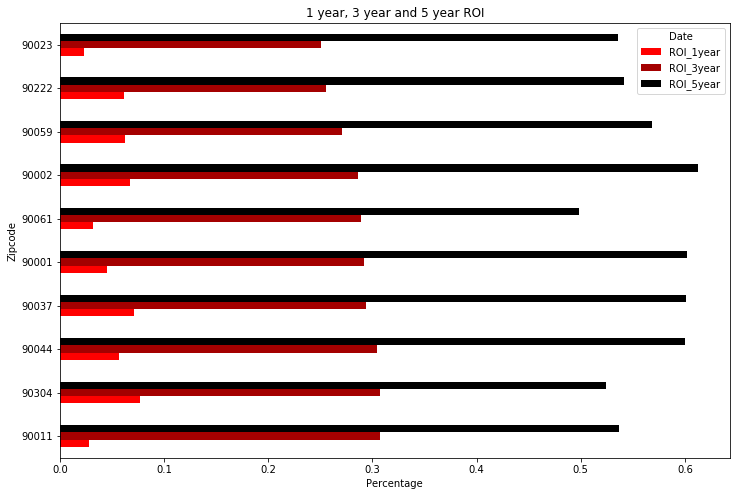

In [62]:
# Closer look at the zip codes and their home values
top10_3ROI.plot(x = "Zipcode", y = ['ROI_1year', "ROI_3year","ROI_5year"], kind = "barh",
              figsize = (12, 8), colormap = "flag")
plt.xlabel("Percentage")
plt.title("1 year, 3 year and 5 year ROI")
plt.show()

In [63]:
dfannual = pd.read_csv('Data/clean_data_la.csv',index_col=0)

In [64]:
dfannual.head()

,Zipcode,City,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
15,90250,Hawthorne,Los Angeles,152500.0,152600.0,152600.0,152600.0,152600.0,152600.0,152600.0,...,579300,585700,590900,594700,598500,601300,602800,606100,612400,616200
30,90046,Los Angeles,Los Angeles,340600.0,341700.0,343000.0,344400.0,346100.0,348000.0,350300.0,...,1839800,1861100,1888600,1903900,1907500,1922100,1952400,1974500,1975900,1966900
75,90034,Los Angeles,Los Angeles,231300.0,231700.0,232100.0,232400.0,232700.0,233200.0,233800.0,...,1287500,1310000,1329900,1347200,1360300,1368500,1382700,1398000,1411400,1419100
86,90044,Los Angeles,Los Angeles,119500.0,119500.0,119400.0,119300.0,119200.0,119100.0,119100.0,...,383800,386900,390600,394300,398600,404200,409700,414300,418500,421100
90,90805,Long Beach,Los Angeles,128300.0,128100.0,127800.0,127500.0,127100.0,126800.0,126600.0,...,426900,430600,434800,439300,443500,447700,451700,455000,457600,459100


In [65]:
zipcodes_for_model

['90304',
 '90037',
 '90002',
 '90059',
 '90222',
 '90044',
 '90220',
 '90813',
 '91768',
 '91767',
 '90001',
 '90201',
 '90805',
 '90255',
 '91766',
 '90270',
 '91722',
 '90716',
 '90723',
 '91351',
 '90040',
 '91744',
 '90061',
 '90221',
 '90650',
 '90262',
 '91702',
 '91746',
 '90011',
 '91706',
 '90670',
 '90660',
 '90023',
 '90810',
 '90022',
 '90606']

In [66]:
dfannual = dfannual.loc[dfannual['Zipcode'].isin(zipcodes_for_model)]

In [67]:
dfannual['Zipcode'] = dfannual['Zipcode'].astype('str')

In [68]:
dfannual.drop(columns = ['City','CountyName'],inplace=True)

In [69]:
dfannual.head()

,Zipcode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
86,90044,119500.0,119500.0,119400.0,119300.0,119200.0,119100.0,119100.0,119200.0,119400.0,...,383800,386900,390600,394300,398600,404200,409700,414300,418500,421100
90,90805,128300.0,128100.0,127800.0,127500.0,127100.0,126800.0,126600.0,126400.0,126500.0,...,426900,430600,434800,439300,443500,447700,451700,455000,457600,459100
94,90650,146800.0,146400.0,145900.0,145400.0,145000.0,144500.0,144200.0,144000.0,144000.0,...,453800,458000,462500,466200,469200,473000,476600,479300,481200,481800
204,90201,149000.0,148600.0,148000.0,147500.0,147000.0,146500.0,146100.0,145800.0,145700.0,...,408400,412700,417200,421000,425100,429300,432900,435400,437200,437400
263,90011,114000.0,114000.0,114000.0,114000.0,114100.0,114200.0,114400.0,114600.0,115000.0,...,355400,359200,363800,367400,370100,372200,374200,376300,378000,377800


In [70]:
def totimeseries(df):    
    # Creating new transposed dataframe with Date column
    dft = pd.DataFrame()
    dft['Date'] = pd.to_datetime(df.columns.values[1:], format='%Y-%m')

    # Loop to create new column for each zipcode row, populating in property values from each date column. Each zipcode will convert
    # from a row to a column, matching up with the dates in the newly created Month column
    for zip in df.Zipcode: 
        dft[zip] = df[df.Zipcode==zip].iloc[:,1:].values[0]

    # Set Date column as index as required for time series modeling
    dft.set_index('Date',inplace=True)
    return dft

In [71]:
dfannual = totimeseries(dfannual)

In [72]:
dfannual = dfannual.bfill()

In [73]:
dfannual['90037']

Date
1996-04-01    119300.0
1996-05-01    119300.0
1996-06-01    119400.0
1996-07-01    119400.0
1996-08-01    119500.0
                ...   
2017-12-01    423900.0
2018-01-01    429500.0
2018-02-01    435600.0
2018-03-01    441100.0
2018-04-01    443800.0
Name: 90037, Length: 265, dtype: float64

In [74]:
dfannual.to_csv('Data/model_data_4.csv')